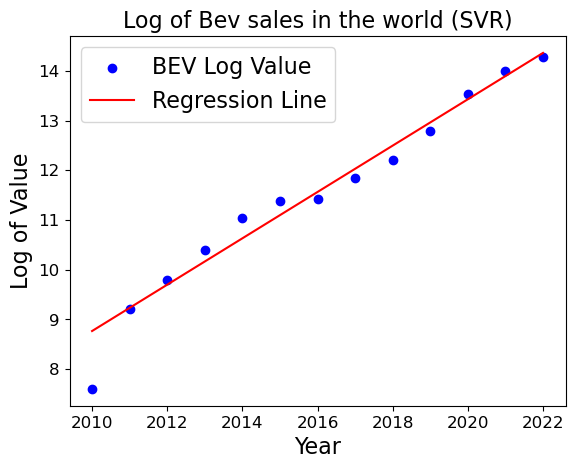

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_csv("EV_Europe.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev=df_bev.drop(['region','powertrain'],axis=1)
df_bev
import numpy as np
# Transform the data
df_bev['log_value'] = df_bev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
model = SVR(kernel= 'linear')
model.fit(df_bev[['year']], df_bev['log_value'])

plt.scatter(df_bev['year'], df_bev['log_value'], color='blue', label='BEV Log Value')
plt.plot(df_bev['year'], model.predict(df_bev[['year']]), color='red', label='Regression Line')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Log of Value',fontsize=16)
plt.title('Log of Bev sales in the world (SVR)', fontsize=16)
plt.legend()    
plt.rcParams["legend.fontsize"] = 15
# Increase font size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

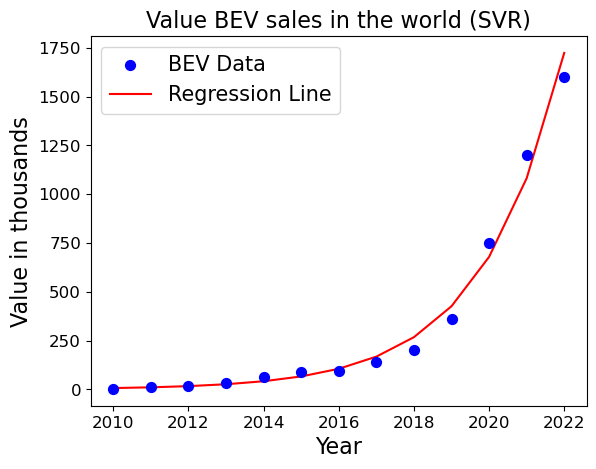

RMSE: 58997.75274684924


In [13]:
# Plot the old data and regression line
plt.scatter(df_bev['year'], df_bev['value']/1000, color='blue', marker='o', s=50, zorder=10, label='BEV Data')
# Transform the data
plt.plot(df_bev['year'], np.exp(model.predict(df_bev[['year']]))/1000, color='red', label='Regression Line')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('Value BEV sales in the world (SVR)', fontsize=16)
plt.legend()
plt.rcParams["legend.fontsize"] = 16
# Increase font size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()    
rmse = np.sqrt(mean_squared_error(df_bev['value'], np.exp(model.predict(df_bev[['year']]))))
print('RMSE:', rmse)

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[ 1724165.71247372  2748226.98102584  4380525.31036547  6982320.64465583
 11129441.82046504 17739728.88654437]


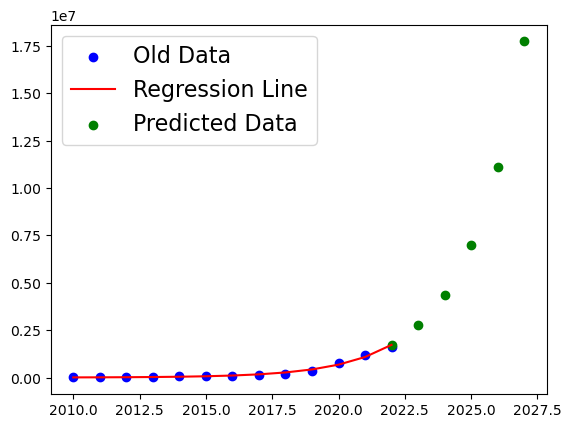

In [14]:
# Predict values for the future years
future_years = [2022,2023, 2024, 2025, 2026, 2027]
future_values = np.exp(model.predict(np.array(future_years).reshape(-1, 1)))
print(future_values)    
#plot graph showing the predicted values
plt.scatter(df_bev['year'], df_bev['value'], color='blue', label='Old Data')
plt.plot(df_bev['year'], np.exp(model.predict(df_phev[['year']])), color='red', label='Regression Line')
plt.scatter(future_years, future_values, color='green', label='Predicted Data')
plt.legend()
plt.show()

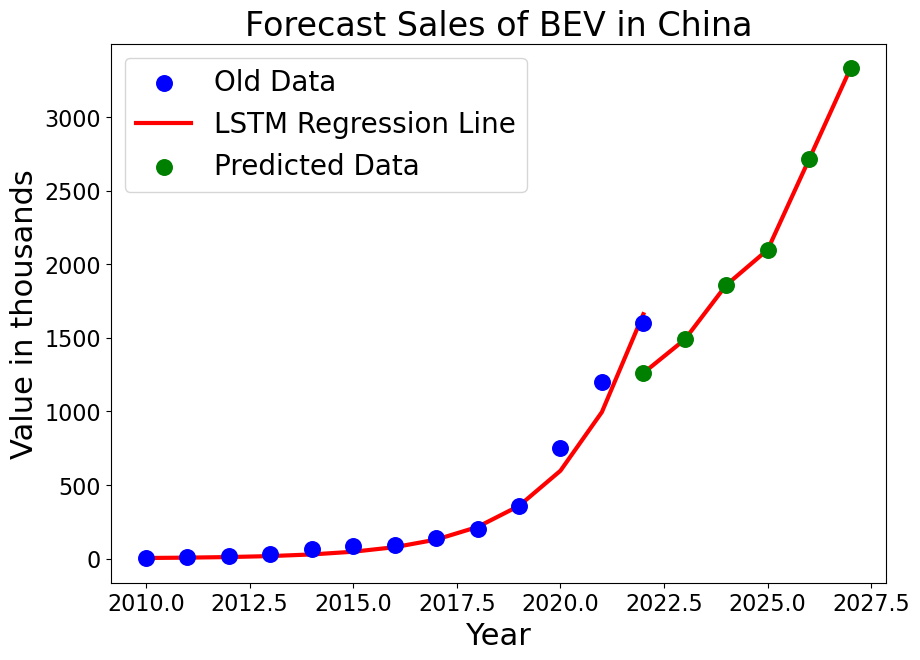

In [24]:
#plot graph showing the predicted values
plt.figure(figsize=(10,7))
plt.scatter(df_bev['year'], df_bev['value']/1000, color='blue',marker='o', s=125, label='Old Data',zorder=10)
plt.plot(future_years, future_values/1000, color='red', linewidth=3)
plt.plot(df_bev['year'],np.exp(model.predict(df_phev[['year']])) /1000, color='red', label='LSTM Regression Line', linewidth=3)
plt.scatter(future_years, future_values/1000, color='green', marker='o', s=125,label='Predicted Data',zorder=10)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Forecast Sales of BEV in China', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [8]:
future_values

array([ 1724165.71247372,  2748226.98102584,  4380525.31036547,
        6982320.64465583, 11129441.82046504, 17739728.88654437])

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[ 1660419.49558703  2769953.06134755  4620904.54312501  7708707.79539958
 12859857.91748622 21453134.56512471]


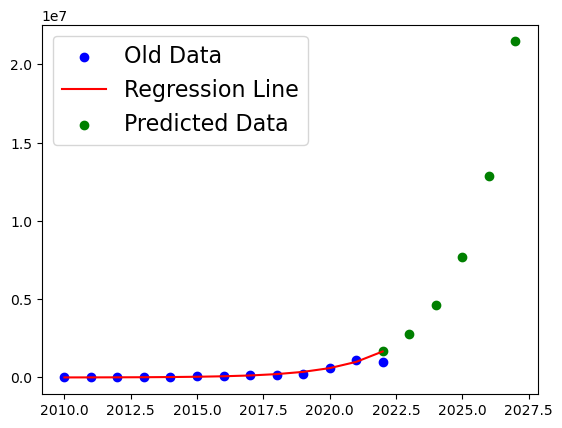

In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_csv("EV_Europe.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev=df_bev.drop(['region','powertrain'],axis=1)
df_phev=df_phev.drop(['region','powertrain'],axis=1)
df_phev
import numpy as np
# Transform the data
df_phev['log_value'] = df_phev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
model = SVR(kernel= 'linear')
model.fit(df_phev[['year']], df_phev['log_value'])

# Predict values for the future years
future_years = [2022,2023, 2024, 2025, 2026, 2027]
future_values = np.exp(model.predict(np.array(future_years).reshape(-1, 1)))
print(future_values)    
#plot graph showing the predicted values
plt.scatter(df_phev['year'], df_phev['value'], color='blue', label='Old Data')
plt.plot(df_phev['year'], np.exp(model.predict(df_phev[['year']])), color='red', label='Regression Line')
plt.scatter(future_years, future_values, color='green', label='Predicted Data')
plt.legend()
plt.show()

In [17]:
np.exp(model.predict(df_phev[['year']]))

array([   3574.06777918,    5962.34869029,    9946.53825864,
         16593.06230978,   27680.95890819,   46178.06356489,
         77035.39323459,  128512.35738166,  214387.50831309,
        357646.56922598,  596634.89595935,  995321.15887684,
       1660419.49558703])

In [18]:
prediction_PHEV=np.array([3574.06777918,    5962.34869029,    9946.53825864,
         16593.06230978,   27680.95890819,   46178.06356489,
         77035.39323459,  128512.35738166,  214387.50831309,
        357646.56922598,  596634.89595935,  935321.15887684,
       1260419.49558703])

In [19]:
future_value=np.array([1488600.2, 1858480.9, 2098582. , 2713435.8, 3332215])
future_year=[ 2023, 2024, 2025, 2026, 2027]

In [20]:
future_year

[2023, 2024, 2025, 2026, 2027]

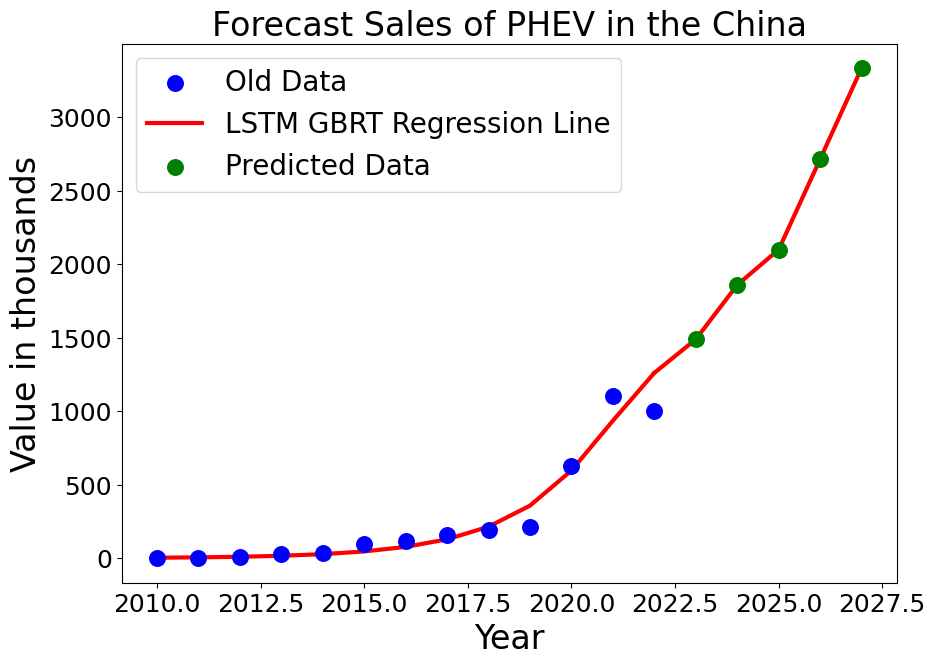

[1260419.49558703 1488600.2        1858480.9        2098582.
 2713435.8        3332215.        ]


In [22]:
future_values=np.array([1260419.49558703, 1488600.2, 1858480.9, 2098582. , 2713435.8, 3332215.])

#plot graph showing the predicted values
plt.figure(figsize=(10,7))
plt.scatter(df_bev['year'], df_phev['value']/1000, color='blue',marker='o', s=125, label='Old Data',zorder=10)
plt.plot(future_years, future_values/1000, color='red', linewidth=3)
plt.plot(df_bev['year'],prediction_PHEV/1000, color='red', label='LSTM GBRT Regression Line', linewidth=3)
plt.scatter(future_year, future_value/1000, color='green', marker='o', s=125,label='Predicted Data',zorder=2)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Value in thousands', fontsize=24)
plt.title('Forecast Sales of PHEV in the China', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
print(future_values)

In [ ]:
1488600.2, 1858480.9, 2098582. , 2713435.8, 3332215.